In [7]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from sklearn.metrics import mean_squared_error

In [8]:

# Example THREDDS URL for GFS temperature data
thredds_url = "https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/RAP/CONUS_13km/RR_CONUS_13km_20240919_2200.grib2"

# Load the GFS temperature data
dataset = xr.open_dataset(thredds_url)

# Extract 3D temperature data (latitude, longitude, height)
temperature_3d = dataset['Temperature_height_above_ground']

# Get  time step 0 (time indices)
time_initial = dataset['time'].values[0]

# Extract  temperature initial 
temperature_initial = temperature_3d.sel(time=time_obs)

latitude_of_projection_origin = dataset['LambertConformal_Projection'].latitude_of_projection_origin
longitude_of_central_meridian = dataset['LambertConformal_Projection'].longitude_of_central_meridian
standard_parallel = dataset['LambertConformal_Projection'].standard_parallel

coordref = ccrs.LambertConformal(
    central_longitude=longitude_of_central_meridian,
    central_latitude=latitude_of_projection_origin,
    #standard_parallels=[standard_parallel]
    )



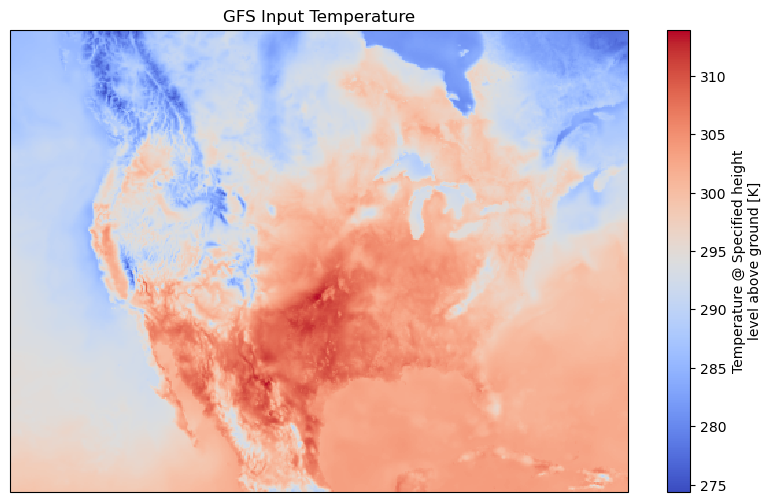

In [9]:

# Plot temperature obs using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=coordref)
temperature_initial.plot(ax=ax, cmap='coolwarm')
ax.coastlines(linewidth=5)
plt.title("GFS Input Temperature")
plt.show()